### 7_RandomForest_Classifier.ipynb

## 랜덤 포레스트 분류 (Random Forest Classifier)

- 여러 개의 결정 트리를 만들고, 각 트리의 예측값 중 '가장 많은 표'를 받은 클래스를 최종 예측 결과로 채택 (다수결 투표)
- 분류 문제에서 높은 성능을 보이고, 해석이 비교적 쉬움

In [21]:
import numpy as np

# 샘플 데이터
x = np.array([[10], [20], [30], [40], [50], [60], [70], [80], [90]])
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1])

# 학습
from sklearn.ensemble import RandomForestClassifier

# tree : 10
model = RandomForestClassifier(n_estimators=10, random_state=42)
model.fit(x, y)

y_pred = model.predict(x)

# 평가
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y, y_pred)

print(f'Random Forest Classifier :: accuracy : {accuracy}')

Random Forest Classifier :: accuracy : 1.0


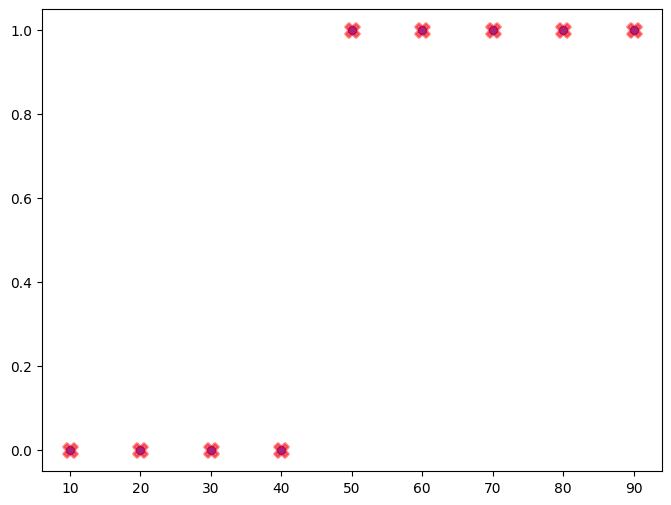

In [22]:
# 산점도 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))

plt.scatter(x, y, color='blue', alpha=0.7)
plt.scatter(x, y_pred, marker='X', color='red', alpha=0.5, lw=2, s=100)


---

In [23]:
# iris dataset
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

iris = load_iris()

# 독립변수, 종속변수를 다중할당
x, y = iris.data, iris.target

# 훈련용, 테스트용 분리
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [24]:
# * 랜덤포레스트분류
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(x_train, y_train)

y_pred = model.predict(x_test)

from sklearn.metrics import classification_report
print('* --- random forest report --- *')
print(classification_report(y_test, y_pred, target_names=iris.target_names))

* --- random forest report --- *
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
# 첫 번째 트리 시각화